In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the datasets
world_cup_data = pd.read_csv('WorldCups.csv')
matches_data = pd.read_csv('WorldCupMatches.csv')
players_data = pd.read_csv('WorldCupPlayers.csv')

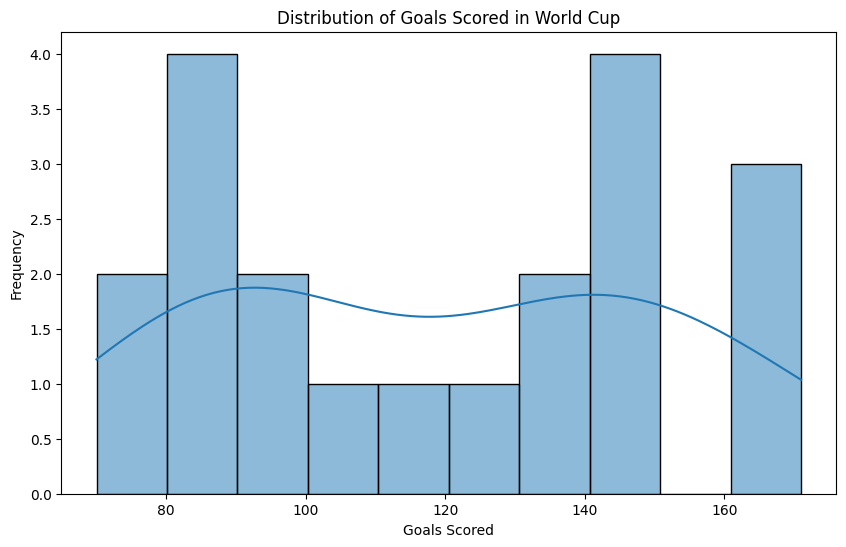

In [ ]:
# Perform EDA
# Histogram of goals scored
plt.figure(figsize=(10, 6))
sns.histplot(world_cup_data['GoalsScored'], bins=10, kde=True)
plt.title('Distribution of Goals Scored in World Cup')
plt.xlabel('Goals Scored')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Data Preprocessing
# Handling missing values
world_cup_data.dropna(inplace=True)  # Remove rows with missing values

In [ ]:
# Encoding categorical variables
matches_data_encoded = pd.get_dummies(matches_data, columns=['Home Team Name', 'Away Team Name'])

In [ ]:
#  Normalizing numerical variables
world_cup_data['Goals_normalized'] = (world_cup_data['GoalsScored'] - world_cup_data['GoalsScored'].min()) / (world_cup_data['GoalsScored'].max() - world_cup_data['GoalsScored'].min())

In [ ]:
# Data Cleaning
# Removing duplicates
players_data.drop_duplicates(inplace=True)

In [ ]:
# Handling outliers
matches_data['Attendance'].clip(upper=100000, inplace=True)  # Cap the attendance at 100,000

In [ ]:
# Resolving inconsistencies
world_cup_data['Country'].replace({'Germany FR': 'Germany', 'Côte d’Ivoire': 'Ivory Coast'}, inplace=True)

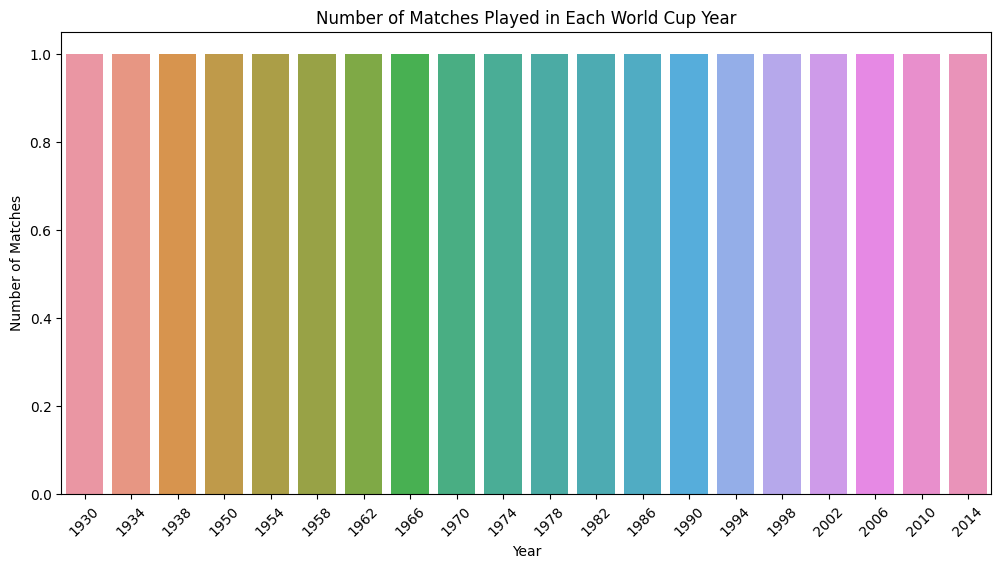

In [ ]:
# Plot the number of matches played in each World Cup year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=world_cup_data)
plt.title('Number of Matches Played in Each World Cup Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.show()


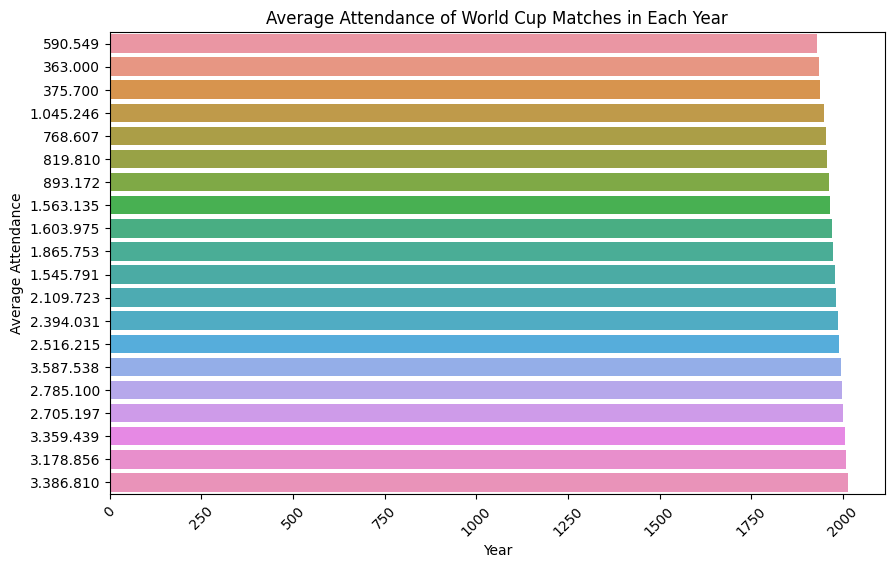

In [ ]:
# Plot the average attendance of World Cup matches in each year
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Attendance', data=world_cup_data)
plt.title('Average Attendance of World Cup Matches in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.xticks(rotation=45)
plt.show()

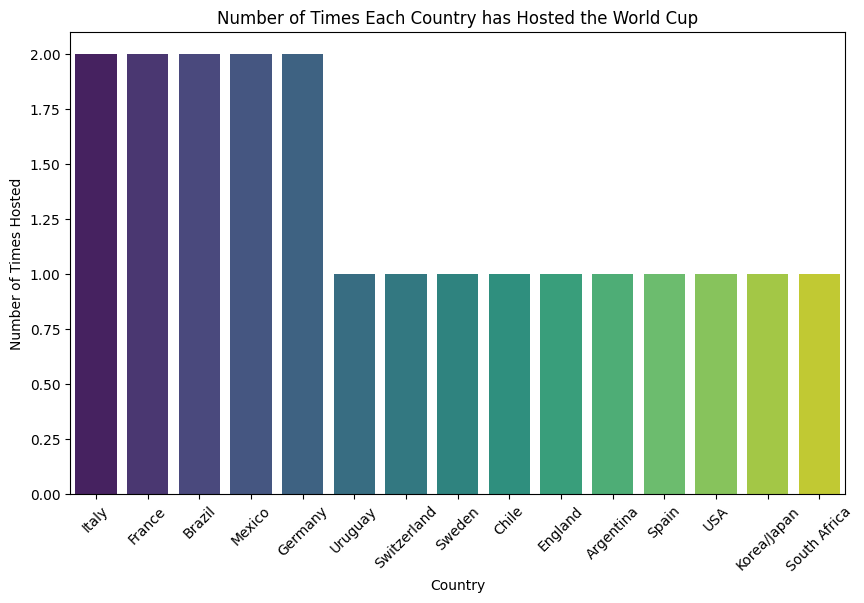

In [ ]:
# Count the number of times each country has hosted the World Cup
host_counts = world_cup_data['Country'].value_counts()

# Visualize the hosts using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=host_counts.index, y=host_counts.values, palette='viridis')
plt.title('Number of Times Each Country has Hosted the World Cup')
plt.xlabel('Country')
plt.ylabel('Number of Times Hosted')
plt.xticks(rotation=45)
plt.show()


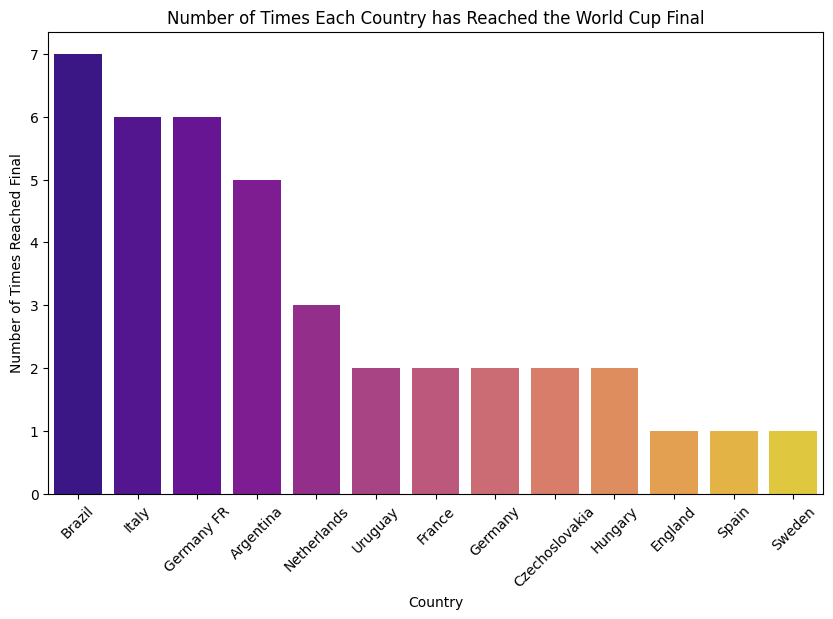

In [ ]:
# Combine the winners and runners-up columns to get a list of finalists
finalists = pd.concat([world_cup_data['Winner'], world_cup_data['Runners-Up']])

# Count the number of times each country has reached the final
finalist_counts = finalists.value_counts()

# Visualize the finalists using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=finalist_counts.index, y=finalist_counts.values, palette='plasma')
plt.title('Number of Times Each Country has Reached the World Cup Final')
plt.xlabel('Country')
plt.ylabel('Number of Times Reached Final')
plt.xticks(rotation=45)
plt.show()

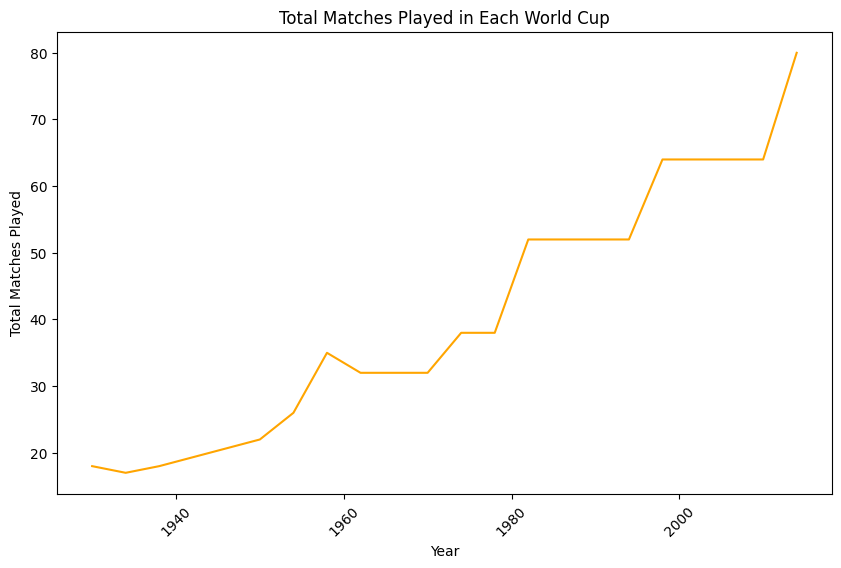

In [ ]:
# Calculate the total matches played in each World Cup
matches_per_cup = matches_data.groupby('Year').size()

# Visualize the matches played using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=matches_per_cup.index, y=matches_per_cup.values, color='orange')
plt.title('Total Matches Played in Each World Cup')
plt.xlabel('Year')
plt.ylabel('Total Matches Played')
plt.xticks(rotation=45)
plt.show()

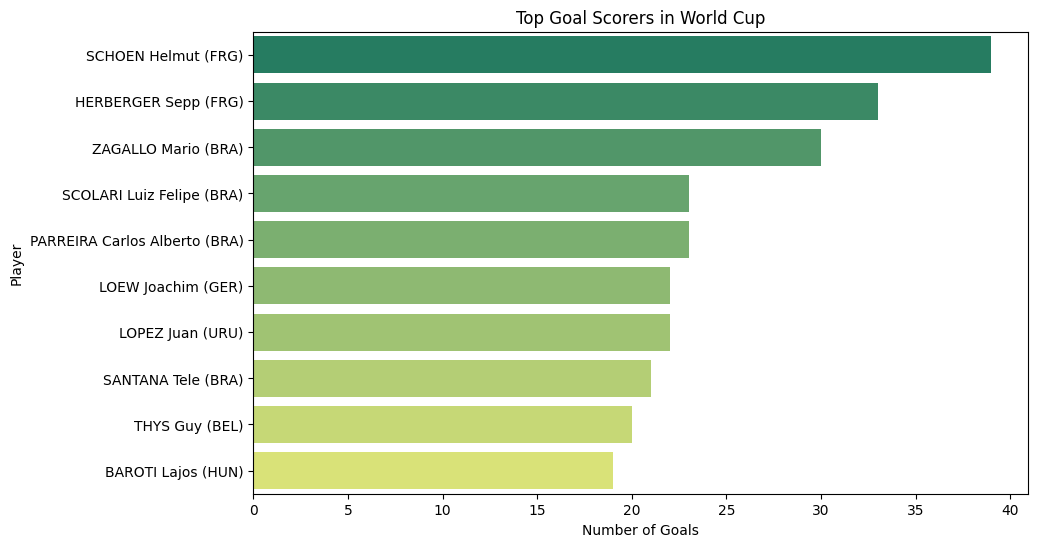

In [ ]:
# Extract the goal scorers from the events column in players_df
goal_scorers = players_data[players_data['Event'].str.startswith('G', na=False)]

# Count the number of goals scored by each player
top_scorers = goal_scorers['Coach Name'].value_counts().nlargest(10)

# Visualize the top goal scorers using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scorers.values, y=top_scorers.index, palette='summer')
plt.title('Top Goal Scorers in World Cup')
plt.xlabel('Number of Goals')
plt.ylabel('Player')
plt.show()

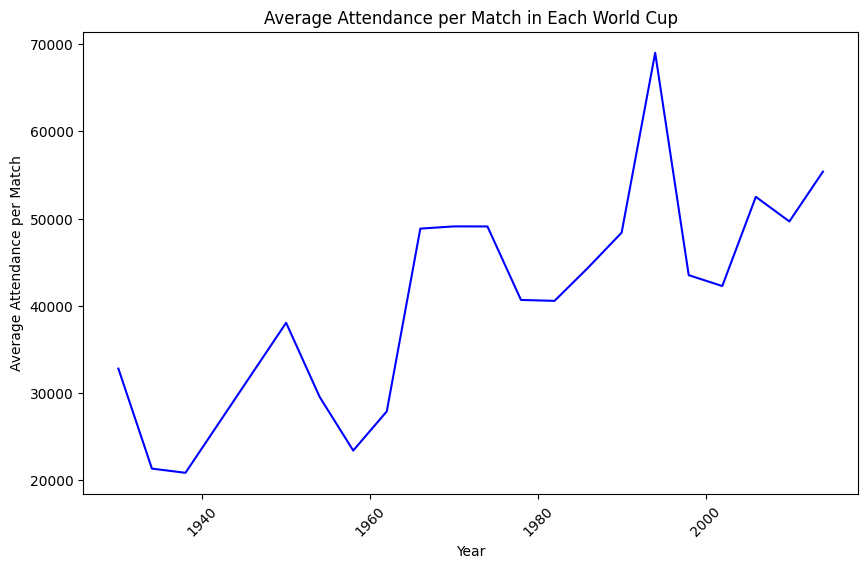

In [ ]:
# Calculate the average attendance per match in each World Cup
avg_attendance_per_cup = matches_data.groupby('Year')['Attendance'].mean()

# Visualize the average attendance using a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_attendance_per_cup.index, y=avg_attendance_per_cup.values, color='blue')
plt.title('Average Attendance per Match in Each World Cup')
plt.xlabel('Year')
plt.ylabel('Average Attendance per Match')
plt.xticks(rotation=45)
plt.show()

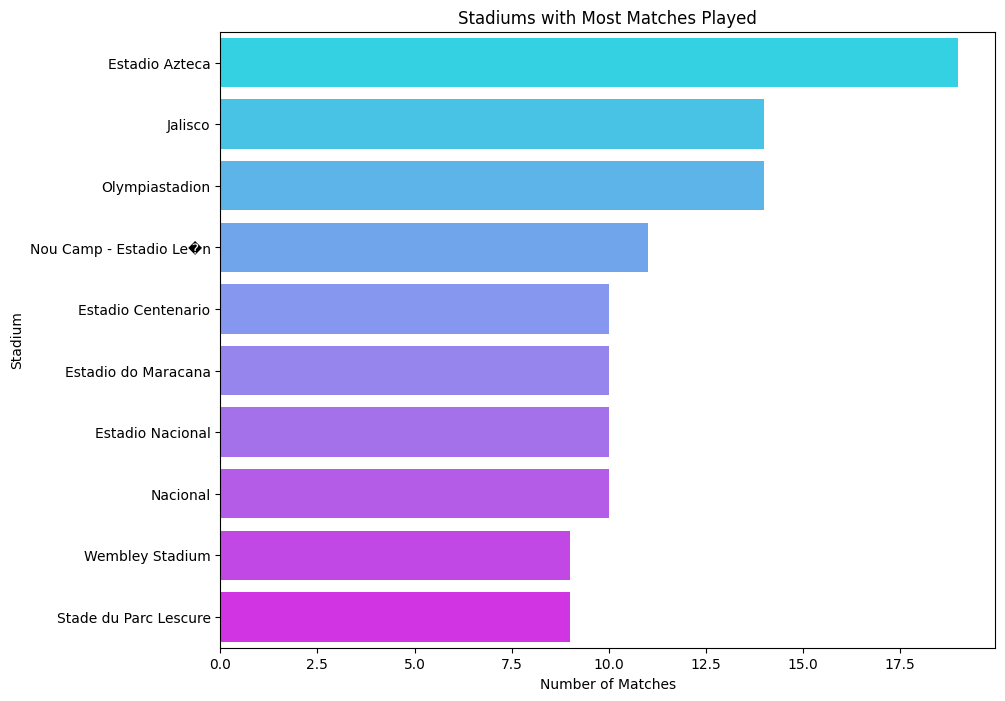

In [ ]:
# Count the number of matches played in each stadium
matches_per_stadium = matches_data['Stadium'].value_counts()

# Visualize the stadiums with most matches using a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=matches_per_stadium.values[:10], y=matches_per_stadium.index[:10], palette='cool')
plt.title('Stadiums with Most Matches Played')
plt.xlabel('Number of Matches')
plt.ylabel('Stadium')
plt.show()

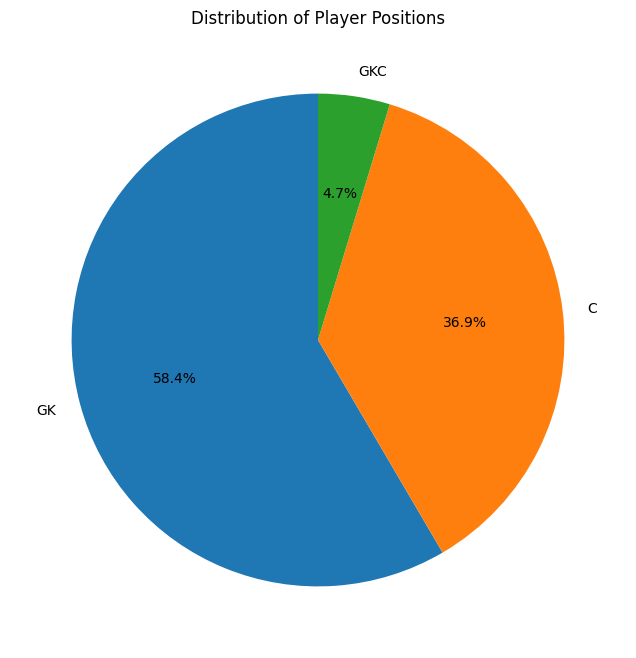

In [ ]:
# Count the number of players in each position
player_positions = players_data ['Position'].value_counts()

# Visualize the player positions using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(player_positions.values, labels=player_positions.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Player Positions')
plt.show()

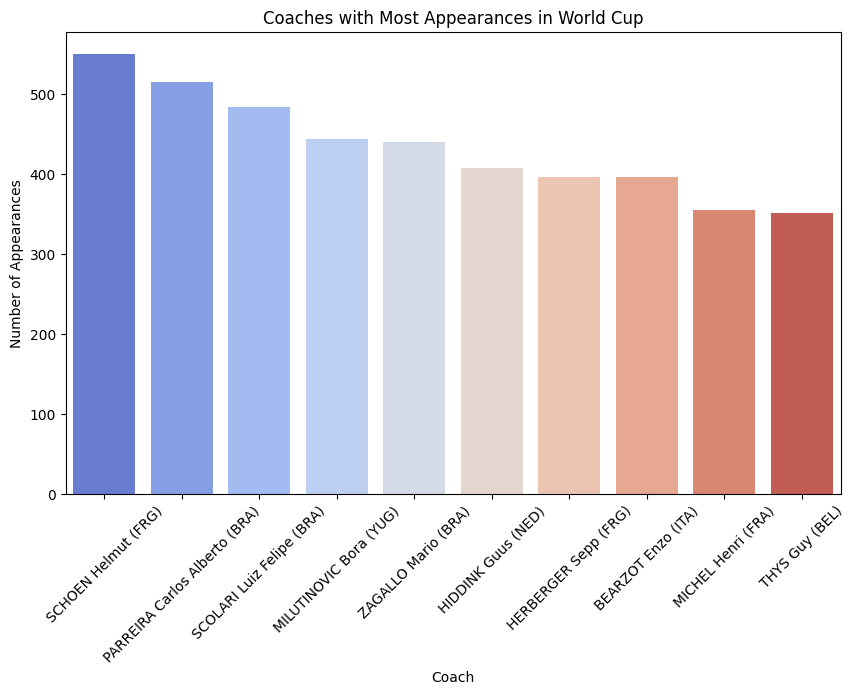

In [ ]:
# Count the number of times each coach has appeared in the World Cup
coach_counts = players_data ['Coach Name'].value_counts()

# Visualize the coaches with most appearances using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=coach_counts.index[:10], y=coach_counts.values[:10], palette='coolwarm')
plt.title('Coaches with Most Appearances in World Cup')
plt.xlabel('Coach')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.show()

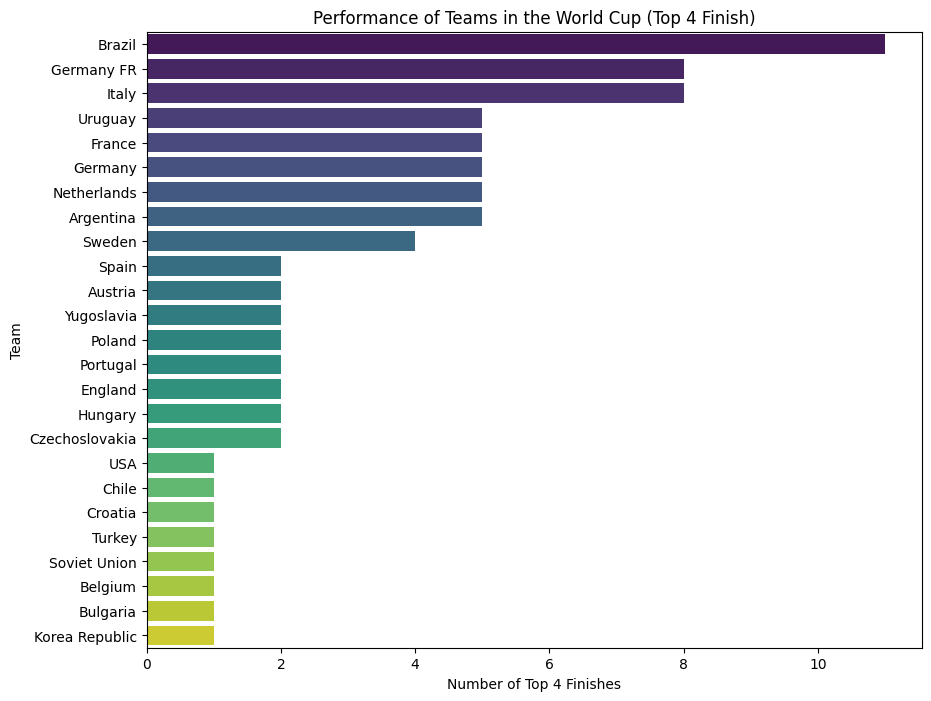

In [ ]:
# Calculate the number of times each team has reached the top 4 in the World Cup
top_4_teams = pd.concat([world_cup_data ['Winner'], world_cup_data ['Runners-Up'], world_cup_data ['Third'], world_cup_data ['Fourth']])
top_4_teams_count = top_4_teams.value_counts()

# Visualize the performance of teams using a horizontal bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=top_4_teams_count.values, y=top_4_teams_count.index, palette='viridis')
plt.title('Performance of Teams in the World Cup (Top 4 Finish)')
plt.xlabel('Number of Top 4 Finishes')
plt.ylabel('Team')
plt.show()